In [2]:
from keras.layers import Input, Dense
from keras.models import Model

In [155]:
encoding_dim = 32

input_img = Input(shape=(784,))
# encoded = Dense(784, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# decoded = Dense(64, activation='sigmoid')(encoded)
# decoded = Dense(128, activation='sigmoid')(decoded)
# decoded = Dense(256, activation='sigmoid')(decoded)
# decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [156]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))  

In [166]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_62 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_151 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_152 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_153 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_154 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_155 (Dense)            (None, 784)               25872     
Total params: 270,064
Trainable params: 270,064
Non-trainable params: 0
_________________________________________________________________


In [167]:
from keras.datasets import mnist
import numpy as np

In [168]:
(x_train,_),(x_test,_) = mnist.load_data()

In [169]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [170]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
               validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s - loss: 0.1486 - acc: 0.8061 - val_loss: 0.1459 - val_acc: 0.8069
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.1465 - acc: 0.8065 - val_loss: 0.1441 - val_acc: 0.8078
Epoch 3/50
60000/60000 [==============================] - 5s - loss: 0.1442 - acc: 0.8069 - val_loss: 0.1419 - val_acc: 0.8083
Epoch 4/50
60000/60000 [==============================] - 5s - loss: 0.1417 - acc: 0.8074 - val_loss: 0.1377 - val_acc: 0.8078
Epoch 5/50
60000/60000 [==============================] - 6s - loss: 0.1393 - acc: 0.8078 - val_loss: 0.1359 - val_acc: 0.8084
Epoch 6/50
60000/60000 [==============================] - 5s - loss: 0.1372 - acc: 0.8081 - val_loss: 0.1338 - val_acc: 0.8087
Epoch 7/50
60000/60000 [==============================] - 6s - loss: 0.1354 - acc: 0.8084 - val_loss: 0.1323 - val_acc: 0.8089
Epoch 8/50
60000/60000 [==============================] - 5s 

In [171]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [172]:
import matplotlib.pyplot as plt

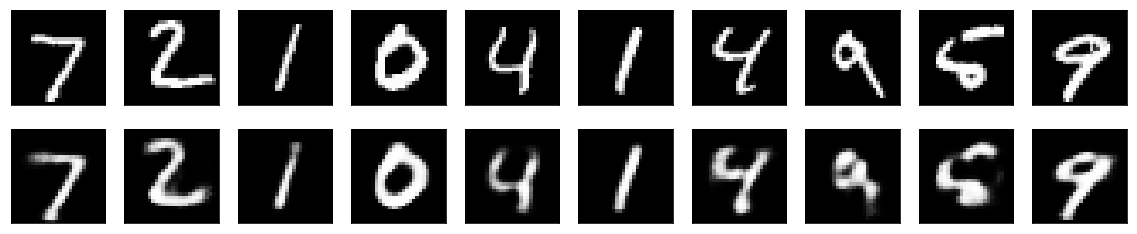

In [182]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
        
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()